In [1]:
import numpy as np
import sys
# nums = [3,44,38,5,15,27,1,99,36]
nums = list(np.random.randint(0,10000,10000))
ans = sorted(nums)

# Bubble Sort

时间复杂度为 O(N^2)

空间复杂度为 O(1)

In [2]:
def bubble_sort(nums,printed=False):
    """
    普通冒泡排序
    """
    ans = nums.copy()
    n = len(ans)
    times_of_compare = 0
    times_of_swap = 0
    for i in range(n-1): #比较n-1轮
        for j in range(1,n-i): #每次比较n-1次
            times_of_compare += 1
            if ans[j-1] > ans[j]:
                times_of_swap += 1
                ans[j-1],ans[j] = ans[j],ans[j-1]
    if printed:
        print('一共比较了%d次' %times_of_compare)
        print('一共交换了%d次' %times_of_swap)
        print('一共操作了%d次'%(times_of_compare+times_of_swap))
    return ans
assert bubble_sort(nums,printed=True) == ans

一共比较了49995000次
一共交换了24857243次
一共操作了74852243次


时间复杂度为 O(N^2),最好情况为O(N),即比较了第一轮已经排序成功，第二轮比较时flag没有被赋值为True,循环结束。

空间复杂度为 O(1)

In [3]:
def bubble_sort_with_flag(nums,printed=False):
    """
    带有排序指示flag的冒泡排序
    """
    ans = nums.copy()
    n = len(ans)
    times_of_compare = 0
    times_of_swap = 0
    flag = True #一个信号来检查每轮是否已经排好序
    i = 0
    while flag: #比较n-1轮
        flag = False
        for j in range(1,n-i): #每次比较n-1次
            times_of_compare += 1
            if ans[j-1] > ans[j]:
                times_of_swap +=1
                ans[j-1],ans[j] = ans[j],ans[j-1]
                flag = True
        i+=1
    if printed:
        print('一共比较了%d次' %times_of_compare)
        print('一共交换了%d次' %times_of_swap)
        print('一共操作了%d次'%(times_of_compare+times_of_swap))
    return ans
assert bubble_sort_with_flag(nums,printed=True) == ans

一共比较了49994220次
一共交换了24857243次
一共操作了74851463次


时间复杂度为 O(N^2),最好情况为O(N),即比较了第一轮已经排序成功，第二轮比较时flag没有被赋值为True,循环结束。

空间复杂度为 O(1)

In [4]:
def bubble_sort_with_flag_and_pos(nums,printed=False):
    """
    带有排序指示flag和上轮比较最后指针pos的冒泡排序
    """
    ans = nums.copy()
    n = len(ans)
    times_of_compare = 0
    times_of_swap = 0
    flag = True #一个信号来检查每轮是否已经排好序
    pos = n #一个信号来记录上次排序中最后发生交换的index，然后下次遍历比较中指针到pos位就结束了
    while flag: #比较n-1轮
        flag = False
        for j in range(1,pos): #每次比较n-1次
            times_of_compare += 1
            if ans[j-1] > ans[j]:
                times_of_swap +=1
                ans[j-1],ans[j] = ans[j],ans[j-1]
                flag = True
                pos = j
    if printed:
        print('一共比较了%d次' %times_of_compare)
        print('一共交换了%d次' %times_of_swap)
        print('一共操作了%d次'%(times_of_compare+times_of_swap))
    return ans
assert bubble_sort_with_flag_and_pos(nums,printed=True) == ans

一共比较了49994220次
一共交换了24857243次
一共操作了74851463次


# Insertion Sort

时间复杂度为 O(N^2),最好情况为O(N)。

空间复杂度为 O(1)

In [5]:
def insertion_sort(nums,printed=False):
    """
    普通插入排序
    """
    ans = nums.copy()
    n = len(ans)
    times_of_compare = 0
    times_of_swap = 0
    for i in range(1,n):
        tmp = i
        while ans[tmp] < ans[tmp-1] and tmp > 0: #当右边元素比左边元素小时，交换两者元素
            times_of_compare += 1
            times_of_swap +=1
            ans[tmp],ans[tmp-1] = ans[tmp-1],ans[tmp] #交换
            tmp -=1 #下标左移一位
    if printed:
        print('一共比较了%d次' %times_of_compare)
        print('一共交换了%d次' %times_of_swap)
        print('一共操作了%d次'%(times_of_compare+times_of_swap))
    return ans
assert insertion_sort(nums,printed=True)==ans

一共比较了24857243次
一共交换了24857243次
一共操作了49714486次


时间复杂度为 O(N^2),最好情况为O(N),下标搜索的时间复杂度由O(k)变为O(logk),k为要插入元素的下标。

空间复杂度为 O(1)

In [6]:
def binary_search_right_border(nums,target):
    """
    在升序数组中找到target应该插入的位置
    如在数组[1,2,3,5,6]中，target = 4,返回index=3
    """
    if not nums:
        return -1
    times_of_compare = 0
    l, r = 0, len(nums)
    while l < r:
        times_of_compare += 1
        mid = l + (r - l) // 2
        if target == nums[mid]:
            l = mid + 1
        if target > nums[mid]:
            l = mid + 1
        else:
            r = mid
        times_of_compare += 1
    return l,times_of_compare

def insertion_sort_with_binary_search(nums,printed=False):
    """
    使用二分查找搜索插入位置的插入排序
    """
    ans = nums.copy()
    n = len(ans)
    times_of_swap = 0
    times_of_compare = 0 
    for i in range(1,n):
        tmp = i
        pos,toc = binary_search_right_border(ans[0:i],ans[i])
        times_of_compare += 1
        while tmp != pos: #当tmp指针还没移动到pos位时执行交换；当在pos+1位时执行最后一次交换后，tmp==pos，达到终止条件
            times_of_swap +=1
            ans[tmp],ans[tmp-1] = ans[tmp-1],ans[tmp] #交换
            tmp -=1 #下标左移一位
    if printed:
        print('一共比较了%d次' %times_of_compare)
        print('一共交换了%d次' %times_of_swap)
        print('一共操作了%d次'%(times_of_compare+times_of_swap))
    return ans
assert insertion_sort_with_binary_search(nums,printed=True)==ans

一共比较了9999次
一共交换了24857801次
一共操作了24867800次


# Merge Sort

时间复杂度为 O(N^2)。

空间复杂度为 O(N)

In [7]:
class Merge_Sort:
    def __init__(self):
        self.times_of_compare = 0
        self.times_of_swap = 0
        
    def merge(self,nums,l,m,r):
        i,j = l,m+1 #左右游标
        tmp = [] #临时数组存储元素
        while i <= m and j <= r:
            self.times_of_compare  += 1
            if nums[i] < nums[j]:  #小于的添加左边元素 
                tmp.append(nums[i])
                self.times_of_swap +=1
                i += 1
            elif nums[i] > nums[j]: #小于的添加右边元素
                tmp.append(nums[j])
                self.times_of_swap +=1
                j+=1
            else: #若两边元素相等则同时添加2次后，左右游标各加一
                tmp.append(nums[i])
                tmp.append(nums[j])
                self.times_of_swap +=2
                i += 1
                j += 1
        if i > m and j > r: #如果终止的原因是两边的数组都被排序完毕
            self.times_of_compare  += 1
            pass
        elif i > m: #若左游标超出了边界，但右边的数组元素还未被完全添加，则添加右边的所有元素
            self.times_of_compare  += 1
            tmp.extend(nums[j:r+1])
            self.times_of_swap += (r+1-j)
        else:#若右游标超出了边界，但左边的数组元素还未被完全添加，则添加左边的所有元素
            self.times_of_compare  += 1
            tmp.extend(nums[i:m+1])
            self.times_of_swap += (m+1-i)
        nums[l:r+1] = tmp

    def mergesort(self,nums,l,r):
        if l < r:
            self.times_of_compare += 1
            m = (l+r)//2 #取中点
            self.mergesort(nums,l,m) #对左边进行归并排序
            self.mergesort(nums,m+1,r) #对右边进行归并拍醒
            self.merge(nums,l,m,r) #对两边的升序序列进行合并操作
        else: #不满足递归条件直接返回
            return
    def Merge_Sort(self,nums,printed=False):
        if len(nums) <= 1:
            return nums
        ans = nums.copy()
        self.mergesort(ans,0,len(ans)-1)
        if printed:
            print('一共比较了%d次' %self.times_of_compare)
            print('一共交换了%d次' %self.times_of_swap)
            print('一共操作了%d次'%(self.times_of_compare+self.times_of_swap))
        return ans
    
assert Merge_Sort().Merge_Sort(nums,printed=True)==ans

一共比较了136659次
一共交换了133616次
一共操作了270275次


## BucketSort / CountSort/ RadixSort

### Bucket Sort:

要求数组的取值范围不能过大，可以为int或者float。

时间复杂度：对于N个元素，假设分成M个桶，N个元素均匀分布在M个桶中。每个桶中元素为L = N/M，排序时间复杂度为O(L*logL),总体时间复杂度为 M*O(L*LogL) = N * Log (N/M). 若M足够大，那么N/M可以看成是一个常数，总体时间复杂度为O(N)

空间复杂度：O(M)

### Count_Sort:

要求数组的取值范围不能过大，且必须为int型

时间复杂度: 遍历一遍待排序的数组后，再遍历一遍存储的数组，因此为O(N)

空间复杂度: O(M)

### Radix Sort:

对数组的范围没有要求，但必须为int型

时间复杂度：O(k*n), 其中k为最大数字的位数，一般不会超过30，因此也可以看成O(N)的复杂度

空间复杂度：O(N)


In [84]:
def Bucket_Sort(nums):
    """
    前提是知道数组的取值范围，可以为int或者float
    """
    tmp = nums.copy()
    bucket = [[] for i in range(50000 // 100)] #生成桶，这里由于数组范围为1~10000，分成100个桶比较合适
    for i in tmp:
        bucket[i//100].append(i) #把每个元素放进对应的桶里
    for i in range(len(bucket)):
        bucket[i] =  Merge_Sort().Merge_Sort(bucket[i]) #每个桶进行单独的排序
    ans = []
    for i in bucket:
        ans.extend(i) #按照递增的顺序把桶里已经排序好的元素放进数组里面
    return ans 

assert Bucket_Sort(nums)==ans

In [87]:
def Count_Sort(nums):
    """
    前提是知道数组的取值范围且都为int数
    """
    times_of_operation = 0
    arr = [0] * 50000
    for i in nums:
        times_of_operation += 1
        arr[i] += 1
    ans = []
    for i in range(len(arr)):
        times_of_operation += 1
        ans.extend([i]*arr[i]) #将下标放进ans数组里面arr[i]次。若arr[i] == 0,说明无此元素，则无法被添加进去
        times_of_operation += arr[i]
    return ans

assert Count_Sort(nums)==ans

In [10]:
def Radix_Sort(nums):
    """
    前提是数组均为int型整数，无需限制数组的范围
    """
    max_nums = max(nums) #获取数组最大值
    max_radix = len(str(max_nums)) #获取最大值的位数，来确定k。如最大数为987，max_rax = 3
    ans = nums.copy()
    for i in range(max_radix):     
        tmp = [[] for i in range(10)] #初始化10个桶，每个桶装位数对应的数
        for num in ans:
            tmp[num // (10 ** i) % 10].append(int(num))
        ans = [] #清空ans数组
        for t in tmp:
            ans.extend(t) #按递增顺序依次装入桶中元素
    return ans

assert Radix_Sort(nums) == ans

# HeapSort


时间复杂度： 插入O(N*logN),交换堆顶元素到最后O(1),维护堆为最大堆状态O(N*logN).总共O(N*logN)的时间复杂度

空间复杂度：只在原来数组上操作，O(N)

In [11]:
class Heap:
    def __init__(self,nums):
        self.ans = nums.copy() #赋值待排序数组
    
    def insert(self):
        for i in range(len(self.ans)):
            if i == 0: #如果是第一个元素，直接当作头结点
                continue 
            else:
                cur_index = i #当前待插入的元素下标
                parent_index = (i-1)//2 #父节点的下标
                
                while cur_index > 0 and parent_index >=0: #当待插入的下标和父节点的下标均在数组里面时
                    node = self.ans[cur_index]
                    parent = self.ans[parent_index]
                    if parent >= node: #如果父母节点元素较大，那么无需改变此时数组元素的位置，直接跳出while循环，进入下一个for循环
                        break
                    else:
                        #如果父母节点较小，交换两者的元素，同时更新当前下标和父节点下标
                        self.ans[cur_index],self.ans[parent_index] = self.ans[parent_index],self.ans[cur_index]
                        cur_index = parent_index
                        parent_index = (parent_index - 1)//2
    
    def get_bigger_child_index(self,left_index,right_index,border):
        """
        返回两个子节点中较大节点的下标
        """
        if left_index >= border: #若左节点已经出界了，可以判定无需进行交换，返回None
            return None
        elif right_index >= border:#若只有右节点出了边界，左节点没出，只返回左节点
            return left_index
        elif self.ans[left_index] >= self.ans[right_index]: #只返回较大节点的下标，下同
            return left_index
        else:
            return right_index
    
    def sort(self):
        n = len(self.ans)
        self.insert() #先组建Heap
        
        for i in range(len(self.ans)):
            border = n - 1 - i #指示Heap和已排序部分的边界，ans[border-1]为Heap，ans[border]为已排序部分
            self.ans[0],self.ans[border] = self.ans[border],self.ans[0] #删除Heap的头结点并与边界交换
            cur_index = 0
            bigger_child_index = self.get_bigger_child_index(cur_index*2+1,cur_index*2+2,border)
            while cur_index < border and bigger_child_index != None:
                if self.ans[cur_index] < self.ans[bigger_child_index]:
                    self.ans[cur_index],self.ans[bigger_child_index] = self.ans[bigger_child_index],self.ans[cur_index]
                    cur_index = bigger_child_index
                    bigger_child_index = self.get_bigger_child_index(cur_index*2+1,cur_index*2+2,border)
                else:
                    break
        return self.ans

assert Heap(nums).sort() == ans

## Random Quick Sort

时间复杂度： O(N*logN),极小几率O(N^2)

空间复杂度：只在原来数组上操作，O(N)

In [12]:
def randomized_partition(nums,l,r):
    """
    根据给定的数组和边界进行随机partition
    """
    j = np.random.randint(l,r+1) #随机生成pivot的下标
    nums[j],nums[r] = nums[r],nums[j] #与末尾元素交换
    pivot = nums[r]
    
    i = l - 1
    for j in range(l,r): #参考partition过程，
        if nums[j] <= pivot: 
            i += 1 
            nums[i],nums[j] = nums[j],nums[i] #交换元素
    nums[i+1],nums[r] = nums[r],nums[i+1] #把在末尾的中枢移动到应在的位置
    return i+1 #返回中枢的下标

def random_quick_sort(nums,l,r):
    """
    随机快排递归程序
    """
    if l < r:
        q = randomized_partition(nums,l,r)
        random_quick_sort(nums,l,q-1) #对左边进行partition
        random_quick_sort(nums,q,r) #对右边进行partition

def main_random_quick_sort(nums):
    ans = nums.copy()
    random_quick_sort(ans,0,len(ans)-1)
    return ans

assert main_random_quick_sort(nums) == ans

## Comparison

In [75]:
import matplotlib.pyplot as plt
ten_3 = list(np.random.randint(0,5000,5000))
%timeit bubble_sort(ten_3)
%timeit bubble_sort_with_flag(ten_3)
%timeit bubble_sort_with_flag_and_pos(ten_3)
%timeit insertion_sort(ten_3)
%timeit insertion_sort_with_binary_search(ten_3)
%timeit Merge_Sort().Merge_Sort(ten_3)
%timeit Bucket_Sort(ten_3)
%timeit Count_Sort(ten_3)
%timeit Radix_Sort(ten_3)
%timeit Heap(ten_3).sort()
%timeit main_random_quick_sort(ten_3)

1.6 s ± 30.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.65 s ± 15.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.65 s ± 14.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.22 s ± 19.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
823 ms ± 8.93 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
17.4 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
10.7 ms ± 23.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.6 ms ± 4.11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.97 ms ± 14 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
23.1 ms ± 187 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
18.2 ms ± 43.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [88]:
ten_4 = list(np.random.randint(0,50000,50000))
%timeit -r 1 -n 1 bubble_sort(ten_4)
%timeit -r 1 -n 1 bubble_sort_with_flag(ten_4)
%timeit -r 1 -n 1 bubble_sort_with_flag_and_pos(ten_4)
%timeit -r 1 -n 1 insertion_sort(ten_4)
%timeit -r 1 -n 1 insertion_sort_with_binary_search(ten_4)
%timeit -r 1 -n 1 Merge_Sort().Merge_Sort(ten_4)
%timeit -r 1 -n 1 Bucket_Sort(ten_4)
%timeit -r 1 -n 1 Count_Sort(ten_4)
%timeit -r 1 -n 1 Radix_Sort(ten_4)
%timeit -r 1 -n 1 Heap(ten_4).sort()
%timeit -r 1 -n 1 main_random_quick_sort(ten_4)

123 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
10.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
60.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
302 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
190 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<ipython-input-93-6f1520f9f42b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(label, Rotation=70)
<ipython-input-93-6f1520f9f42b>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.set_xticklabels(label, Rotation=70)


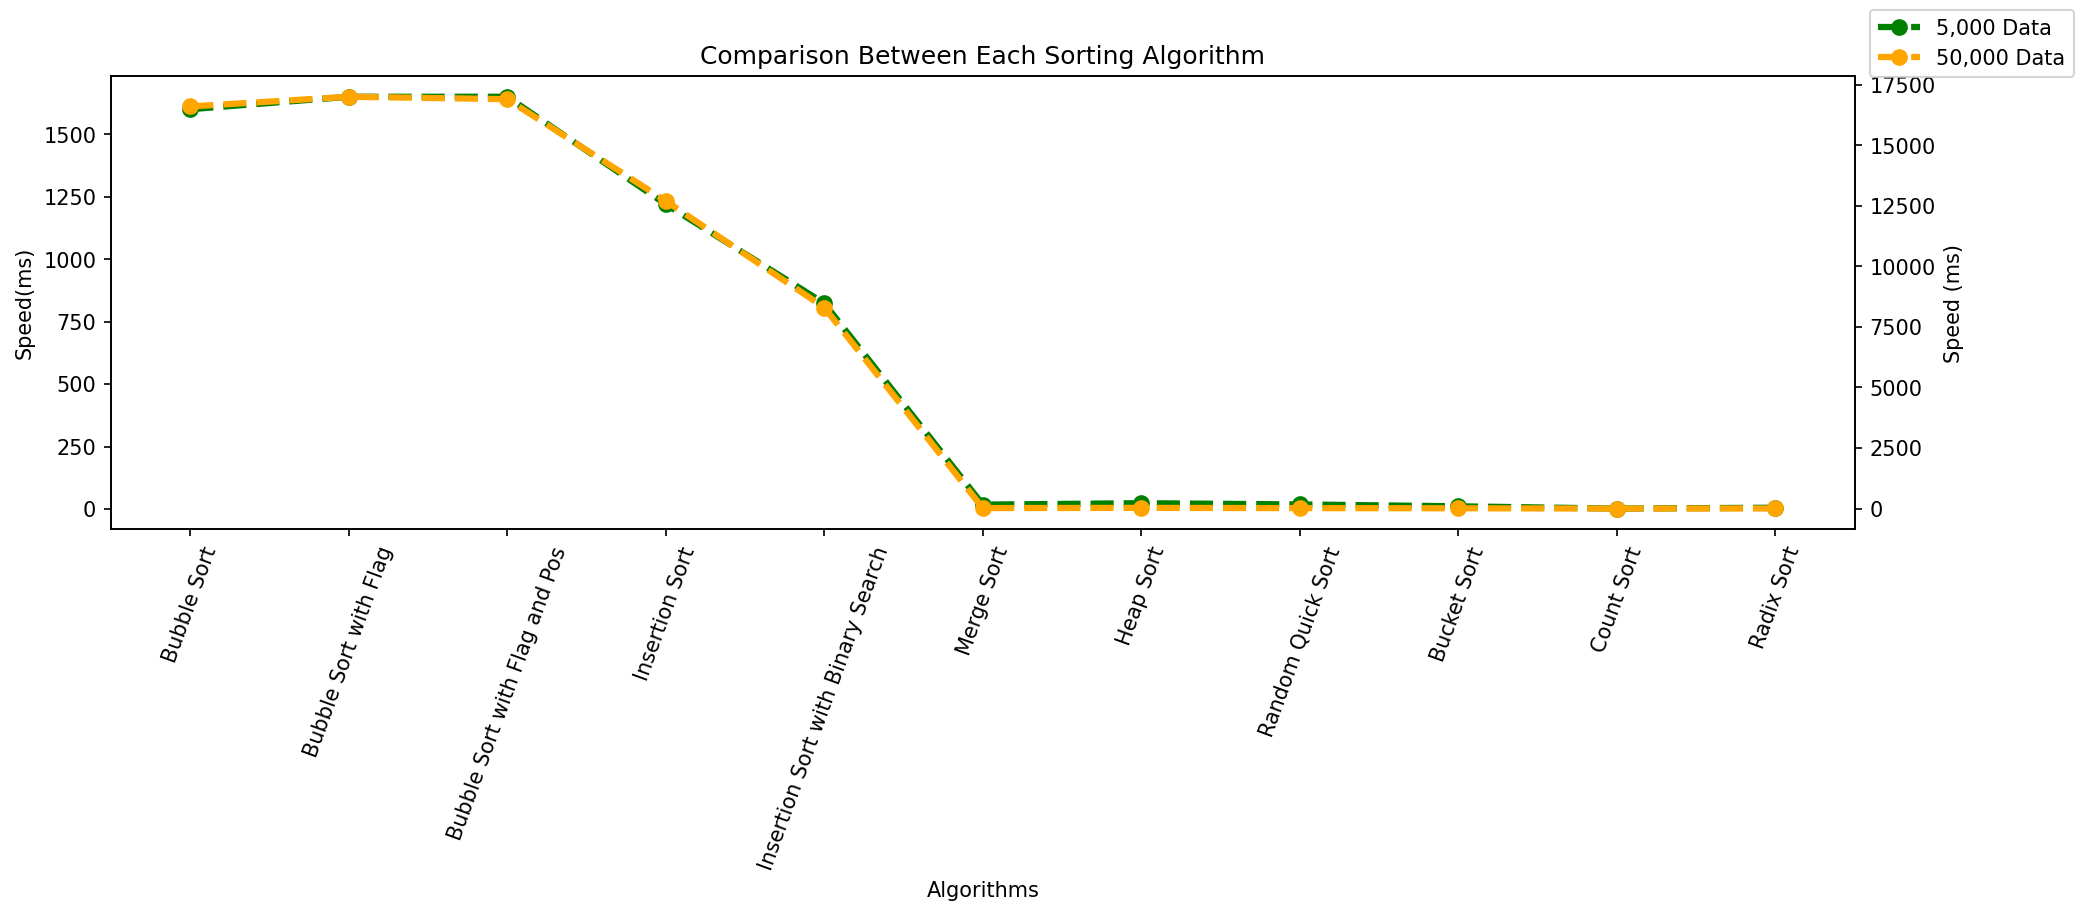

In [93]:
speed_3 = [1600,1650,1650,1220,823,17.4,23.1,18.2,10.7,1.6,4.97]
speed_4 = [166000,170000,169000,127000,83000,214,302,190,123,10.3,60.9]
label=['Bubble Sort','Bubble Sort with Flag','Bubble Sort with Flag and Pos','Insertion Sort','Insertion Sort with Binary Search',
      'Merge Sort','Heap Sort','Random Quick Sort','Bucket Sort','Count Sort','Radix Sort']
fig = plt.figure(figsize=[15,4],dpi=150)
ax1=fig.subplots()
ax2=ax1.twinx()
ax1.plot(label,speed_3,marker='o',linestyle= "--", linewidth = 3,markersize=7,color='green',label='5,000 Data')
ax1.set_xlabel('Algorithms')
ax1.set_ylabel('Speed(ms)')
ax1.set_xticklabels(label, Rotation=70)
ax2.plot(range(11),[i / 10 for i in speed_4],marker='o',linestyle= "--", markersize=7,linewidth = 3,color='orange',label='50,000 Data')
ax2.set_ylabel('Speed (ms)')
fig.legend()
plt.title('Comparison Between Each Sorting Algorithm')
plt.savefig('comparison.png',dpi=200)